# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [28]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

# Show statistics of dataset
print 'Dataset statistics:'
data.describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


Dataset statistics:


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Visualization of dataset statistics

Standard deviation of [ age ] : 13.217724074
Mean of [ age ] : 38.5479412675 (indicated with red line)


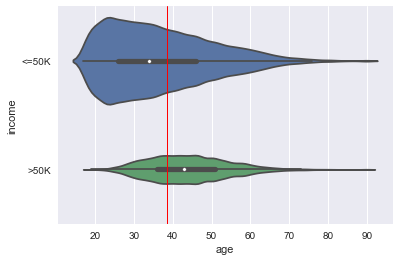

Standard deviation of [ education-num ] : 2.55285296882
Mean of [ education-num ] : 10.1184600416 (indicated with red line)


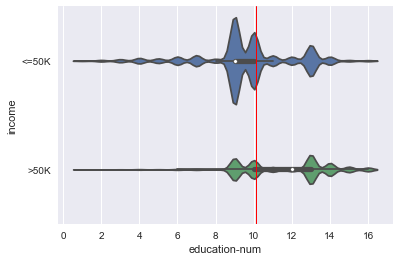

Standard deviation of [ capital-gain ] : 7506.34708795
Mean of [ capital-gain ] : 1101.43034364 (indicated with red line)


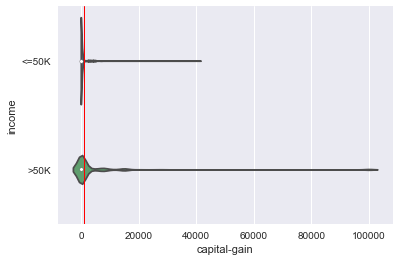

Standard deviation of [ capital-loss ] : 404.951614611
Mean of [ capital-loss ] : 88.5954181593 (indicated with red line)


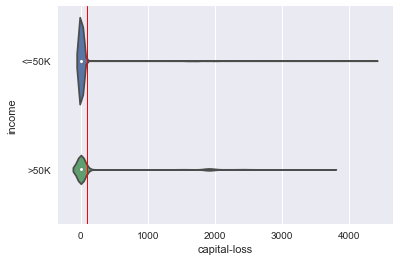

Standard deviation of [ hours-per-week ] : 12.0073754675
Mean of [ hours-per-week ] : 40.9380168944 (indicated with red line)


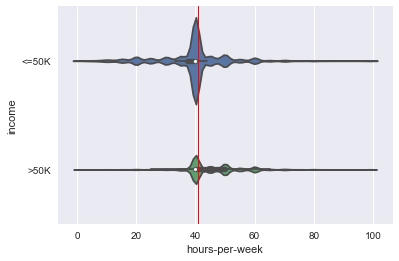

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric = ['age', 'education-num', 'capital-gain','capital-loss','hours-per-week']

for i in numeric:
    fig = sns.violinplot(x=i, y="income", data=data,
               bw=.1, scale="count", scale_hue=False);
    plt.axvline(np.mean(data[i]), c = 'r', lw = 1)
    print "Standard deviation of [", i, "] :", np.std(data[i])
    print "Mean of [",i,"] :",np.mean(data[i]),"(indicated with red line)"
    plt.show()

We can observe that 'capital-gain' and 'capital-loss' has the significantly larger standard derivation.

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [30]:
# TODO: Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's income is more than $50,000
from collections import deque
n_greater_50k = deque(data.income == '>50K').count(True)

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = deque(data.income == '<=50K').count(True)

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100*float(n_greater_50k)/n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


[Class Imbalance]

The class imbalance happens when the total number of a class of data (positive) is far less than the total number of another class of data (negative). In our case, income ">50K" (=11208) is far less than "<=50K", which may cause the problem.

Reference:
http://www.chioka.in/class-imbalance-problem/

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

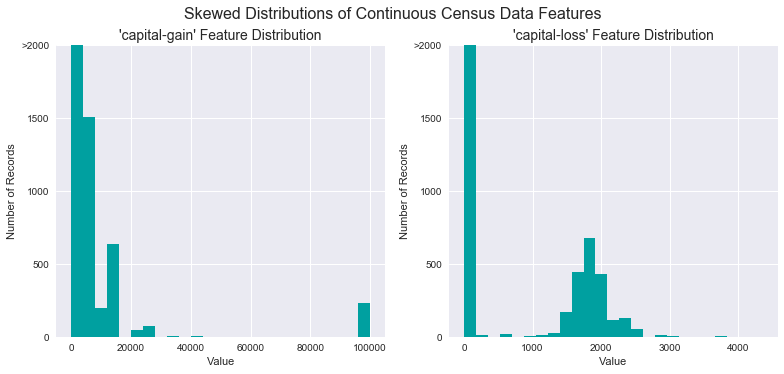

In [31]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

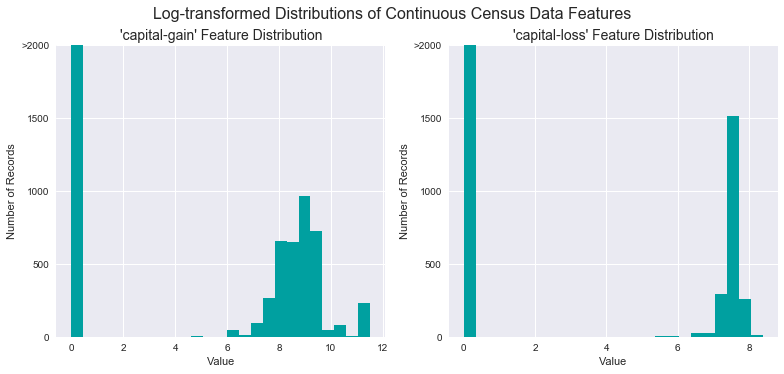

In [32]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [39]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [40]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
non_numeric = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
features = pd.get_dummies(data=features_raw, columns=non_numeric)

# TODO: Encode the 'income_raw' data to numerical values
income = map(lambda x: 0 if x == '<=50K' else 1, data.income)
#print income

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [42]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# To ignore DeprecationWarning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, stratify = income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [43]:
# TODO: Calculate accuracy
accuracy = float(n_greater_50k)/n_records

# TODO: Calculate F-score using the formula above for beta = 0.5
recall = 1.0
beta_2 = 0.5*0.5
fscore = (1.0+beta_2)*(accuracy*recall)/((accuracy*beta_2)+recall)   # accuracy = precision

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **

I would like to compare all these algorithms first (as shown bellow), and then to decide which three of them would be better. Moreover, the first answer of https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms (Quora) inspired me which aspect of these algorithms I should compare.

In [44]:
# For a more beautiful way to display, I stored information into a .csv file
comp = pd.read_csv("classifier_compare.csv")
display(comp)

,Algorithm,Results interpretable?,Algorithm complexity,Average predictive accuracy,Training speed,Prediction speed,Amount of parameter tuning needed (excluding feature selection),Performs well with small number of observations?,Handles lots of irrelevant features well (separates signal from noise)?,Automatically learns feature interactions?,Gives calibrated probabilities of class membership?,Parametric?,Features might need scaling?,Application,Reference
0,GaussianNB,Somewhat,Medium,Lower,Fast,Fast,Some for feature extraction,Yes,Yes,No,No,Yes,No,Explore the brain activities,[0]
1,Decision trees,Somewhat,Medium,Lower,Fast,Fast,Some,No,No,Yes,Possibly,No,No,Dynamic security assessment,[1]
2,Random Forests,A little,Difficult,Higher,Slow,Moderate,Some,No,Yes (unless noise ratio is very high),Yes,Possibly,No,No,Selection of premium-quality vegetable oils,[2]
3,KNN,Yes,Easy,Lower,Fast,Depends on n,Minimal,No,No,No,Yes,No,Yes,Text & Document mining,[3]
4,SGDC,A little,Difficult,Lower,Fast,Fast,Some,Yes,Yes,Yes,No,/,No,Shared Memory Systems,[4]
5,SVM,Somewhat,Difficult,Higher,Slow,Moderate,Some,No,No,Yes,No,No,Yes,Determination of natural gas viscosity,[5]
6,Logistic regression,Somewhat,Medium,Lower,Fast,Fast,None (excluding regularization),Yes,No,No,Yes,Yes,No (unless regularized),Alzheimer's disease study,[6]


Reference of application:

[0]	http://ieeexplore.ieee.org/abstract/document/6779504/

[1]	http://ieeexplore.ieee.org/abstract/document/6631512/

[2]	http://www.sciencedirect.com/science/article/pii/S0308814613010820

[3]	http://web.inf.ufpr.br/menotti/ci171-2015-2-1/files/seminario-Fabricio-artigo.pdf

[4]	http://dl.acm.org/citation.cfm?id=2668133

[5]	http://pubs.acs.org/doi/abs/10.1021/ie402829p

[6]	http://onlinelibrary.wiley.com/doi/10.1111/biom.12504/full

###Selection of Model###

I think it is the most important aspect whether a model performs well on small dataset. Therefore, SGDC, GaussianNB and LogisticRegression are three candidate models which meet this criteria (based on the comparison above);

To consider if our dataset is large or not, I consulted this page: http://scikit-learn.org/stable/tutorial/machine_learning_map/ , and it said 100K is a critical point. Since our data point is far less than 100K, it can be a small dataset.

Meanwhile, SGDC is also recommended by the map (in the link) above in our case. Additionally, the map also indicates GaussianNB is very suitable for text data.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [45]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


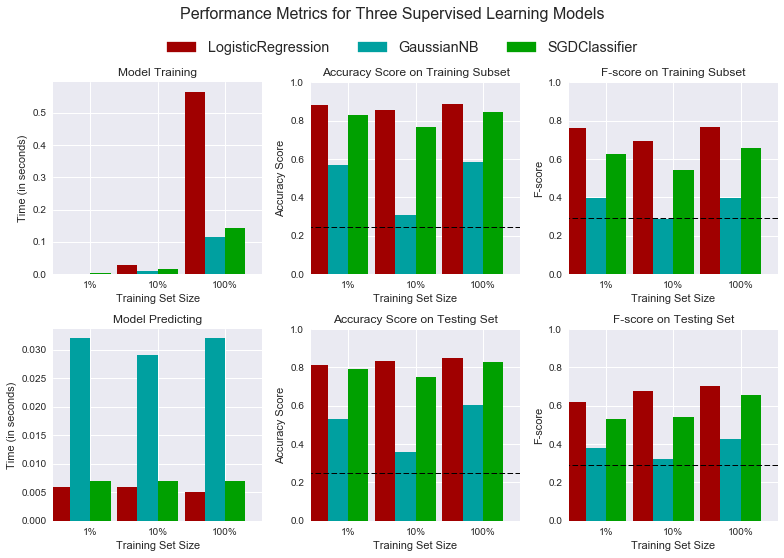

LogisticRegression


,1% of train,10% of train,100% of train
acc_test,0.811719,0.834936,0.846766
acc_train,0.880000,0.856667,0.886667
f_test,0.618951,0.674387,0.703108
f_train,0.760870,0.694444,0.766667
pred_time,0.006000,0.006000,0.005000
train_time,0.002000,0.027000,0.566000


GaussianNB


,1% of train,10% of train,100% of train
acc_test,0.530238,0.358762,0.603759
acc_train,0.570000,0.310000,0.583333
f_test,0.380439,0.320539,0.428152
f_train,0.397196,0.288793,0.396040
pred_time,0.032000,0.029000,0.032000
train_time,0.002000,0.010000,0.116000


SGDClassifier


,1% of train,10% of train,100% of train
acc_test,0.789829,0.749696,0.829630
acc_train,0.830000,0.770000,0.846667
f_test,0.530093,0.539909,0.656145
f_train,0.625000,0.545775,0.660112
pred_time,0.007000,0.007000,0.007000
train_time,0.003000,0.016000,0.143000


In [48]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = SGDClassifier(random_state=42)
clf_C = LogisticRegression(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(X_train)*0.01)
samples_10 = int(len(X_train)*0.1)
samples_100 = int(len(X_train)*1)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

# Numerical output
for i in results.items():
    print i[0]
    display(pd.DataFrame(i[1]).rename(columns={0:'1% of train', 1:'10% of train', 2:'100% of train'}))

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

(1) Accuracy & F-score

First, it's weird that both accuracy and F-score of SGDClassifier suddenly drops at 10% and then increases at 100% training size. Second, the performance of LogisticRegression is stable regardless of the training set size. But for GaussianNB, the more training data, the higher performance is. However, for each size of training set, LogisticRegression always perform far better than GaussianNB, and perform equally to SGDClassifier in 1% and 100% training set size.

(2) Time

LogisticRegression spends far more time on training while GaussianNB need more time to predict. Meanwhile, the more data point, the longer time is needed for training. But the prediction time would be affected by this.

For CharityML, I think accuracy & F-score are the most important in our case, compared to training/prediction time. Therefore, I believe LogisticRegression is the best choice in our case (the data set is not very large).

To confirm that LogisticRegression is really ideal for our problem, I still would like to compare LogisticRegression with other two algorithms  suggested in http://scikit-learn.org/stable/tutorial/machine_learning_map/ (i.e. those algorithms when samples > 100K)

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


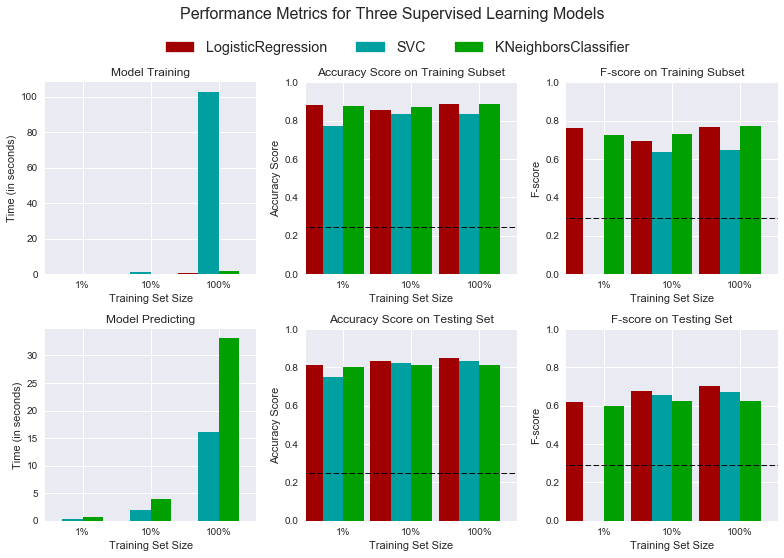

LogisticRegression


,1% of train,10% of train,100% of train
acc_test,0.811719,0.834936,0.846766
acc_train,0.880000,0.856667,0.886667
f_test,0.618951,0.674387,0.703108
f_train,0.760870,0.694444,0.766667
pred_time,0.008000,0.006000,0.006000
train_time,0.002000,0.031000,0.590000


SVC


,1% of train,10% of train,100% of train
acc_test,0.752128,0.824655,0.832283
acc_train,0.773333,0.833333,0.836667
f_test,0.000000,0.653524,0.673508
f_train,0.000000,0.635246,0.645161
pred_time,0.235000,1.989000,16.119000
train_time,0.010000,1.083000,102.809000


KNeighborsClassifier


,1% of train,10% of train,100% of train
acc_test,0.801658,0.812825,0.815036
acc_train,0.876667,0.870000,0.890000
f_test,0.598066,0.622165,0.627063
f_train,0.726744,0.732143,0.773026
pred_time,0.620000,4.029000,33.141000
train_time,0.001000,0.016000,1.778000


In [52]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = SVC(random_state=42)
clf_C = KNeighborsClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(X_train)*0.01)
samples_10 = int(len(X_train)*0.1)
samples_100 = int(len(X_train)*1)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

# Numerical output
for i in results.items():
    print i[0]
    display(pd.DataFrame(i[1]).rename(columns={0:'1% of train', 1:'10% of train', 2:'100% of train'}))

It is obvious that SVM and KNN perform very close to LogisticRegression in most cases, then we have three conclusions:

(1) SVM and KNN seems to be better than GaussianNB and SGDClassifier;

(2) LogisticRegression still can be the best choice of our problem;

(3) Compared to SVM and KNN, the training/prediction time is far less for LogisticRegression;

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

The chosen model is based on 'LogisticRegression';

[model training]: both input and output value is known

1. Because both input and output value is known, each feature is given a weight to quantify how important is that feature. Then the weight of each feature is summed up;

2. The result is then applied to a logistic function where the output is between 0 and 1 (also regarded as probability); Here, if the output is higher than 0.5, then we are pretty sure the person would have income >50K; If the output is lower than 0.5, that "income >50K" may not happen;

[Prediction]: only the input value is known

For any test input value (which consists of many features), we can simply plug it in our model and the output indicate if the person has income larger than 50K.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [55]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedShuffleSplit

# TODO: Initialize the classifier
clf = LogisticRegression(max_iter=500, random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {'penalty':['l1','l2'],'C':[2.0, 6.0, 10.0, 14.0, 18.0],
              'fit_intercept':[True, False]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)
grid_obj = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nThe optimized parameters:"
print best_clf

Unoptimized model
------
Accuracy score on testing data: 0.8468
F-score on testing data: 0.7031

Optimized Model
------
Final accuracy score on the testing data: 0.8489
Final F-score on the testing data: 0.7078

The optimized parameters:
LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |0.2478|0.8468|0.8489|
| F-score        |0.2917|0.7031|0.7078|


**Answer: **

Using deliberately selected and tuned model 'LinearRegression', the performance (i.e. accuracy and F-score) has been dramatically improved. However, if we just compare the performance of unoptimized and optimized model, they are very close. I guess this would because there are so many features in our model, and some of them may be less important for prediction (but the model didn't give the weight to each feature). So, it would be hard to greatly improve the performance of model by optimization without identifying the most important features.

### Another Option: Xgboost

####Note: the two cells below cannot be run, just for display purpose. The script is also attached to the root of "finding_donor" repository in Github

In [ ]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score
from sklearn.grid_search import GridSearchCV
from time import time

# Load dataset
data = pd.read_csv("census.csv")

# Split dataset
income = map(lambda x: 0 if x=='<=50K' else 1, data.income)

features_raw = data.drop('income', axis=1)
non_numeric = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
features = pd.get_dummies(data=features_raw, columns=non_numeric)

X_train, X_test, y_train, y_test = train_test_split(features, income, stratify=income, test_size=0.2, random_state = 42)

# Model fitting
model = XGBClassifier()
model.fit(X_train, y_train)

start = time()
model_pred = model.predict(X_test)
end = time()
pred_time = end - start


# Model tuning
start = time()
parameters = {'max_depth':[2,4,6,8,10],'min_child_weight':[0,2,4,6], 'gamma':[0,2,4],'max_delta_step':[0,3,6,9]}
scorer = make_scorer(fbeta_score, beta=0.5)
grid_fit = GridSearchCV(model, parameters, cv=3, scoring=scorer).fit(X_train, y_train)
best_model = grid_fit.best_estimator_
end = time()
tune_time = end - start

# Scoring
results = {}
results['accuracy_unoptimized']=accuracy_score(y_test, model.predict(X_test))
results['f_score_unoptimized']=fbeta_score(y_test, model.predict(X_test),beta=0.5)
results['accuracy_optimized']=accuracy_score(y_test, best_model.predict(X_test))
results['f_score_optimized']=fbeta_score(y_test, best_model.predict(X_test),beta=0.5)
print best_model
print results
print "Predition time is:", pred_time, "sec, and tuning time is:", tune_time, "sec"

In [ ]:
>>>

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=4, learning_rate=0.1, max_delta_step=3, max_depth=6,
       min_child_weight=4, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
{'accuracy_optimized': 0.86644555002763957, 'f_score_optimized': 0.75058349246764267, 'accuracy_unoptimized': 0.85693753454947486, 'f_score_unoptimized': 0.73486051258788843}
Predition time is: 0.0238847732544 sec, and tuning time is: 2820.11243987 sec

#### Results:

|     Metric     |Unoptimized_Logistic| Unoptimized_Xgboost | Optimized_Logistic |Optimized_Xgboost |
| :------------: | :-----------------: | :---------------: | :-------------: | :-------------: |
| Accuracy Score |0.8483|0.8468|0.8489|0.8664|
| F-score        |0.6993|0.7031|0.7078|0.7505|

As compared above, in terms of accuracy, the xgboost algorithm is slightly better than LogisticRegression model for our problem; moreover, xgboost significantly improves F-score indeed, which indicate its precision is also higher than LogisticRegression;

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

[1] Occupation: directly determine the salary level;

[2] Hours-per-week: also determine the salary level;

[3] Education-level: higher education would make individual decent and care more about society;

[4] Workclass: individual hired by government may care more about society;

[5] Marital-status: it seems that married individual always have sympathy to others since they have babies;

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

Important feature computed by RandomForestClassifier


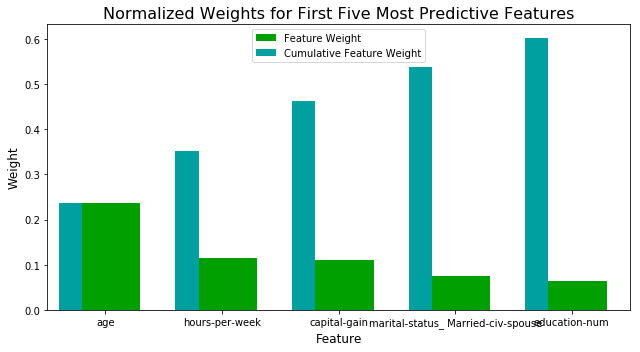

In [19]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
# TODO: Train the supervised model on the training set 
model_1 = RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model_1.feature_importances_
# Plot
print 'Important feature computed by RandomForestClassifier'
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

Only 'hours-per-week' matches my guess in question 6.

The results show that:

[1] Age: this is reasonable to some extent, because young people need money to buy their own car & house and has no extra to donate, although they may earn more than 50K;

[2] Hours-per-week: as I said, this is directly related to salary level;

[3] Capital-gain: except for salary from company, capital-gain(e.g. stock) is another important way to get money;

[4] Relationship_Husband: maybe normally husband in a family earn more than their wife;

[5] Education-num: higher education would make individual decent and care more about society;

In [91]:
# Feature importance based on LogisticRegression (odd_ratio)

from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

scores, pvalues = chi2(X_train, y_train)

coef = pd.DataFrame(zip(clf.coef_.T, np.exp(clf.coef_).T))
coef.columns = ['Coef_','Odds_Ratio_']
coef['P_values'] = pvalues
coef.index = X_train.columns

coef.Coef_ = coef.Coef_.astype(np.float64)
coef.Odds_Ratio_ = coef.Odds_Ratio_.astype(np.float64)

coef

,Coef_,Odds_Ratio_,P_values
age,1.810175,6.111515e+00,3.747991e-51
education-num,1.747256,5.738834e+00,1.786538e-44
capital-gain,18.541401,1.128309e+08,1.365860e-202
capital-loss,2.686286,1.467707e+01,7.061181e-79
hours-per-week,2.806419,1.655055e+01,1.953968e-16
workclass_ Federal-gov,0.192335,1.212076e+00,3.730763e-28
workclass_ Local-gov,-0.444771,6.409710e-01,4.278918e-07
workclass_ Private,-0.275017,7.595589e-01,4.542286e-30
workclass_ Self-emp-inc,-0.172932,8.411944e-01,8.067165e-139
workclass_ Self-emp-not-inc,-0.784475,4.563594e-01,1.097577e-05


The coefficient calculated above indicate the importance ranking as following:

[1] capital-gain

[2] hours-per-week

[3] capital-loss 

[4] age 

[5] education-num

Four features are selected in both RandomForestClassifier and LogisticRegression(Odd_ratio), although they have different ranking in each model: capital-gain, hours-per-week, age, education-num; So, this further confirms that our feature selection is reliable to some extent.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [52]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8500
F-score on testing data: 0.7024

Final Model trained on reduced data
------
Accuracy on testing data: 0.8287
F-score on testing data: 0.6550


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

Both accuracy and F-score reduced after we only select five main feature predicted by RandomForest(), which mean some of dropped features also contribute positively. However, the decrease is still acceptable. I would prefer reduced data as training set when the data point is extremely large (should be at least 1000 times larger than this dataset).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.